Javier Mencia Ledo 1008476114

Part I

For part I, we will be using a dataset about the players in the 2022-2023 La Liga season, Spain's major soccer league.

(array([  1.,   0.,   0.,   1.,  48., 142., 204., 109.,  31.,   6.]),
 array([4.63, 4.92, 5.21, 5.5 , 5.79, 6.08, 6.37, 6.66, 6.95, 7.24, 7.53]),
 <BarContainer object of 10 artists>)

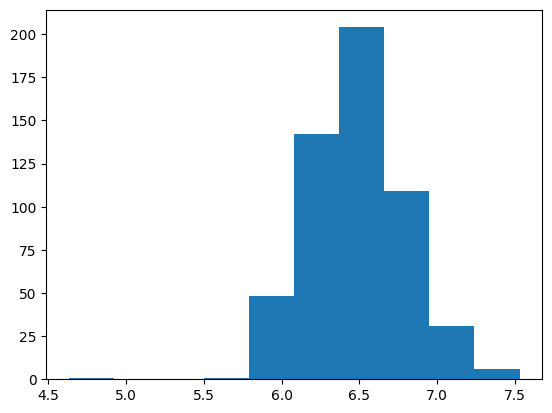

In [43]:
#Data import
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/javmencia/STA365javierMencia/main/laliga.csv'
data = pd.read_csv(url, on_bad_lines='skip')

data = data.fillna(0)
plt.hist(data["Rating"])


We see that the Rating column seems to follow a normal distribution centered at about 6.5, with the exception of an outlier between 4.5 and 5.0

In [49]:
import pymc as pm; import numpy as np
#n,p=len(y[0]),len(X[0])#; X,y=np.zeros((n,p)),np.ones((n,1))

y = [[i/10] for i in (list(data["Rating"]))]
X = np.column_stack((np.ones(len(y)),data["SPG"],data["Goals"], data["Assist"], data["YC"], data["RC"]))
n,p=len(y), len(X[0])

with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.ones((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.Gamma('sigma', alpha=2, beta=1)
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y)

with MLR:
    idata = pm.sample(chains = 4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.63,0.0,0.63,0.63,0.0,0.0,5419.66,3066.66,1.0
"betas[0, 1]",0.63,0.0,0.63,0.63,0.0,0.0,5367.84,3159.53,1.0
"betas[0, 2]",0.63,0.0,0.63,0.63,0.0,0.0,5976.88,3354.31,1.0
"betas[0, 3]",0.63,0.0,0.63,0.63,0.0,0.0,4922.04,3040.66,1.0
"betas[0, 4]",0.63,0.0,0.63,0.63,0.0,0.0,5008.94,3409.98,1.0
"betas[0, 5]",0.63,0.0,0.63,0.63,0.0,0.0,5387.03,3186.14,1.0
"betas[1, 0]",0.01,0.0,0.00,0.01,0.0,0.0,5615.16,2961.78,1.0
"betas[1, 1]",0.01,0.0,0.00,0.01,0.0,0.0,4394.21,3088.06,1.0
"betas[1, 2]",0.01,0.0,0.00,0.01,0.0,0.0,5267.56,3281.72,1.0
"betas[1, 3]",0.01,0.0,0.00,0.01,0.0,0.0,4447.80,2887.64,1.0


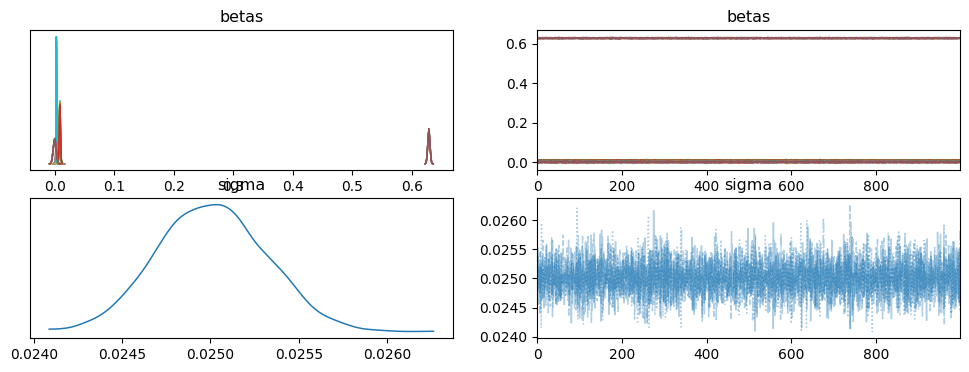

In [50]:
import arviz as az
az.plot_trace(idata, combined=True);
az.summary(idata, round_to=2)



Part II

Here is the link to part II:
https://github.com/javmencia/STA365javierMencia/blob/main/HW5Q2.pdf  

Part III

In [51]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/javmencia/STA365javierMencia/main/baseball_hitting.csv'
data = pd.read_csv(url, on_bad_lines='skip')


In [54]:
#Covariance approach
import numpy as np
import pymc as pm

y = np.array([[i] for i in data["stolen base "]]).reshape(-1, 1)
X = np.column_stack((np.ones(len(y)), data["Hits"], data["AVG"], data["On-base Percentage"]))

n, p = len(y), len(X[0])

with pm.Model() as MVN:
    # Use a Normal prior with a larger standard deviation for mu
    mu = pm.Normal("mu", mu=0, sigma=10, shape=p)

    # Use a HalfCauchy prior with a larger beta for the standard deviation of the Cholesky decomposition
    chol_packed = pm.LKJCholeskyCov("chol_packed", n=p, eta=2.0, sd_dist=pm.HalfCauchy.dist(beta=10, shape=p), compute_corr=False)
    chol = pm.expand_packed_triangular(p, chol_packed)
    Sigma = pm.Deterministic('Sigma', chol.dot(chol.T))

    vals = pm.MvNormal("vals", mu=mu, cov=Sigma, observed=y.reshape(-1,4))

    trace = pm.sample(chains=4)


/usr/local/lib/python3.10/dist-packages/pymc/model.py:1363: ImputationWarning: Data in vals contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


/usr/local/lib/python3.10/dist-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()


/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],64.82,4.68,56.09,73.78,0.05,0.04,8078.44,2660.36,1.0
mu[1],61.78,4.40,53.48,70.15,0.05,0.03,8958.67,3458.84,1.0
mu[2],57.16,3.96,49.92,64.71,0.04,0.03,9598.45,2890.74,1.0
mu[3],63.31,4.15,55.42,71.02,0.04,0.03,8651.69,3045.13,1.0
vals_unobserved[0],67.94,125.35,-181.83,284.91,1.22,1.88,10619.89,3090.65,1.0
...,...,...,...,...,...,...,...,...,...
"vals[625, 3]",2.00,0.00,2.00,2.00,0.00,0.00,4000.00,4000.00,NaN
"vals[626, 0]",64.00,0.00,64.00,64.00,0.00,0.00,4000.00,4000.00,NaN
"vals[626, 1]",228.00,0.00,228.00,228.00,0.00,0.00,4000.00,4000.00,NaN
"vals[626, 2]",0.00,0.00,0.00,0.00,0.00,0.00,4000.00,4000.00,NaN


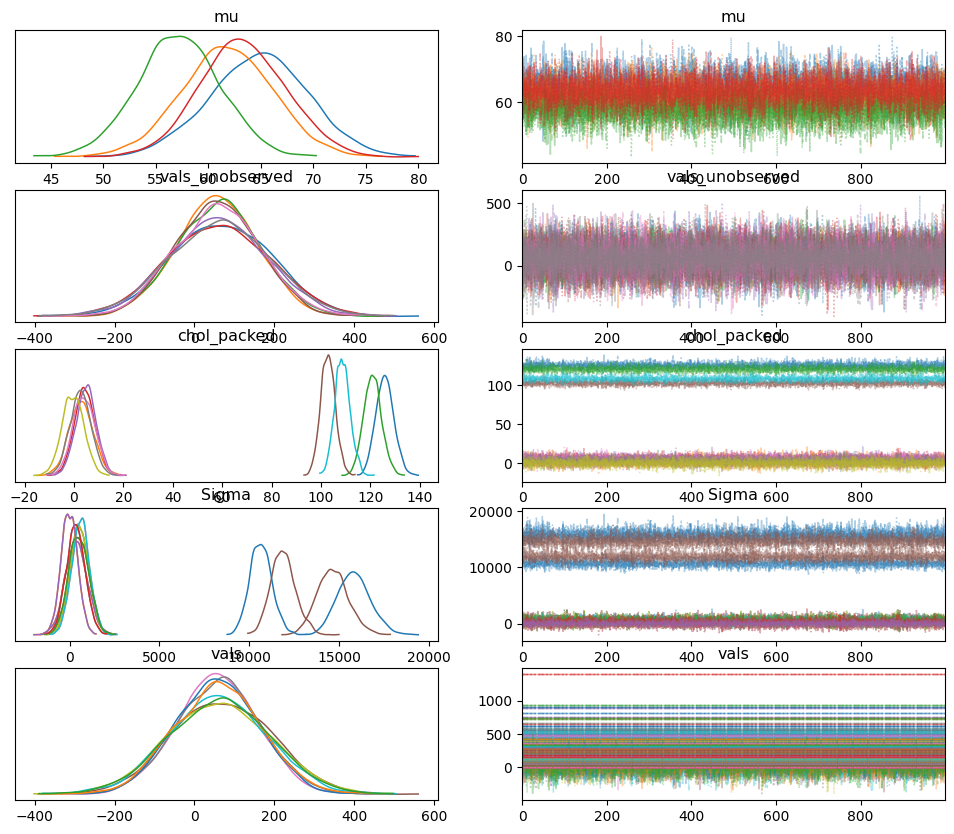

In [57]:
import arviz as az
az.plot_trace(trace, combined=True);
az.summary(trace, round_to=2)

In [58]:
import numpy as np
import pymc as pm

y = np.array([[i] for i in data["stolen base "]]).reshape(-1, 1)
X = np.column_stack((np.ones(len(y)), data["Hits"], data["AVG"], data["On-base Percentage"]))

n, p = len(y), len(X[0])

with pm.Model() as MVN:
    # Use a Normal prior with a larger standard deviation for mu
    mu = pm.Normal("mu", mu=0, sigma=10, shape=p)

    # Use a HalfCauchy prior with a larger beta for the standard deviation of the Cholesky decomposition
    chol_packed = pm.LKJCholeskyCov("chol_packed", n=p, eta=2.0, sd_dist=pm.HalfCauchy.dist(beta=10, shape=p), compute_corr=False)
    chol = pm.expand_packed_triangular(p, chol_packed)

    vals = pm.MvNormal("vals", mu=mu, chol=chol, observed=y.reshape(-1,4))

    trace = pm.sample(chains=4)


/usr/local/lib/python3.10/dist-packages/pymc/model.py:1363: ImputationWarning: Data in vals contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


/usr/local/lib/python3.10/dist-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()


/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],64.87,4.66,56.61,73.86,0.05,0.03,9799.81,3215.30,1.0
mu[1],61.82,4.55,53.25,70.30,0.05,0.03,9640.41,3046.06,1.0
mu[2],57.11,4.01,49.66,65.05,0.04,0.03,9476.92,2963.78,1.0
mu[3],63.27,4.11,55.48,70.86,0.04,0.03,8731.17,2969.11,1.0
vals_unobserved[0],69.00,119.55,-155.81,292.08,1.21,1.68,9749.11,2597.31,1.0
...,...,...,...,...,...,...,...,...,...
"vals[625, 3]",2.00,0.00,2.00,2.00,0.00,0.00,4000.00,4000.00,NaN
"vals[626, 0]",64.00,0.00,64.00,64.00,0.00,0.00,4000.00,4000.00,NaN
"vals[626, 1]",228.00,0.00,228.00,228.00,0.00,0.00,4000.00,4000.00,NaN
"vals[626, 2]",0.00,0.00,0.00,0.00,0.00,0.00,4000.00,4000.00,NaN


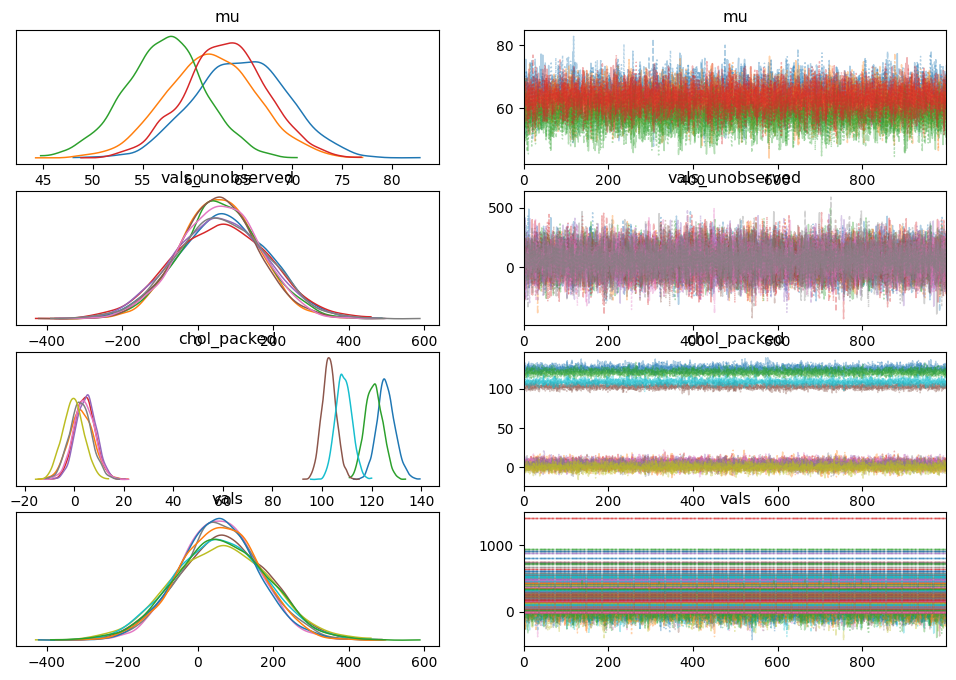

In [59]:
import arviz as az
az.plot_trace(trace, combined=True);
az.summary(trace, round_to=2)

Here we can see the comparison of both approaches, the Covariance parametrization and the Cholesky decomposition. We see that both obtained similar results. Also we see that 3 of the 4 chains in the second approach were faster than the fastest chain in the Covariance approach